<a href="https://colab.research.google.com/github/dhruv025/amazon-product-recommendation-system/blob/master/recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('drive/My Drive/ratings_Electronics .csv',names=['userId', 'productId','Rating','timestamp'])
df1

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [4]:
df1.shape

(7824482, 4)

In [5]:
#taking subset of the dataset as it is very big
df2 = df1.iloc[:50000,0:]
df2.shape

(50000, 4)

In [6]:
#checking for missing values
df2.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

In [7]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df2['Rating'].min()))
print('Maximum rating is: %d' %(df2['Rating'].max()))

Minimum rating is: 1
Maximum rating is: 5


In [8]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


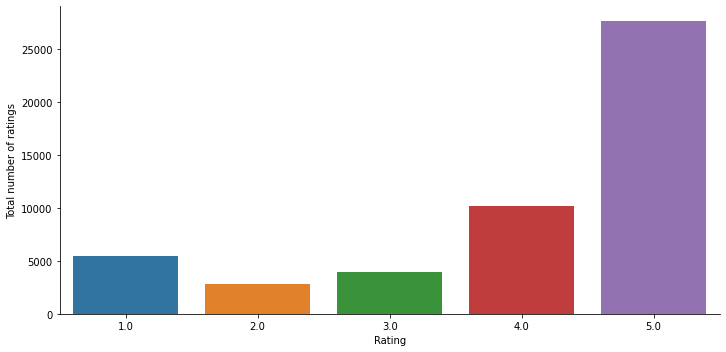

In [9]:
sns.axes_style('whitegrid')
x = sns.catplot("Rating", data=df2, aspect=2.0,kind='count')
x.set_ylabels("Total number of ratings")

In [10]:
df3 = df2.drop(['timestamp'],axis=1)
df3

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
49995,A1ES9IQ5EZ4XQF,B00004TJ0L,5.0
49996,A1BKMNH7BKXIQM,B00004TJ0L,1.0
49997,AVFB9B931P1CJ,B00004TJ0L,4.0
49998,A3IZXJRV8RHUQC,B00004TJ0L,5.0


In [11]:
import numpy as np

In [12]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df3.shape[0])
print("Total No of Users   :", len(np.unique(df3.userId)))
print("Total No of products  :", len(np.unique(df3.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 50000
Total No of Users   : 46554
Total No of products  : 3446


In [13]:
#Analysis of rating given by the user 
rating_per_user = df3.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
rating_per_user.head()

userId
A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
Name: Rating, dtype: int64

In [14]:
rating_per_user.shape

(46554,)

In [15]:
#Analysis of rating given to the product 
rating_per_product = df3.groupby(by='productId')['Rating'].count().sort_values(ascending=False)
rating_per_product.head()

productId
B00001P4ZH    2075
B00004T8R2    1692
B00001WRSJ    1586
0972683275    1051
B00004SABB    1030
Name: Rating, dtype: int64

In [16]:
rating_per_product.shape

(3446,)

In [17]:
df3.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [18]:
df4 = (df3.groupby(by = ['productId'])['Rating'].count().reset_index().rename(columns = {'Rating': 'totalRatingCount'})[['productId', 'totalRatingCount']])
df4.head()

,productId,totalRatingCount
0,0132793040,1
1,0321732944,1
2,0439886341,3
3,0511189877,6
4,0528881469,27


In [19]:
df4.shape

(3446, 2)

In [20]:
df3.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [21]:
rating_with_totalRatingCount = df3.merge(df4,left_on = 'productId',right_on = 'productId',how = 'left')
rating_with_totalRatingCount.head()

,userId,productId,Rating,totalRatingCount
0,AKM1MP6P0OYPR,0132793040,5.0,1
1,A2CX7LUOHB2NDG,0321732944,5.0,1
2,A2NWSAGRHCP8N5,0439886341,1.0,3
3,A2WNBOD3WNDNKT,0439886341,3.0,3
4,A1GI0U4ZRJA8WN,0439886341,1.0,3


In [22]:
rating_with_totalRatingCount.shape

(50000, 4)

In [25]:
df5 = rating_with_totalRatingCount.copy()

In [28]:
df5.head()

,userId,productId,Rating,totalRatingCount
0,AKM1MP6P0OYPR,0132793040,5.0,1
1,A2CX7LUOHB2NDG,0321732944,5.0,1
2,A2NWSAGRHCP8N5,0439886341,1.0,3
3,A2WNBOD3WNDNKT,0439886341,3.0,3
4,A1GI0U4ZRJA8WN,0439886341,1.0,3


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

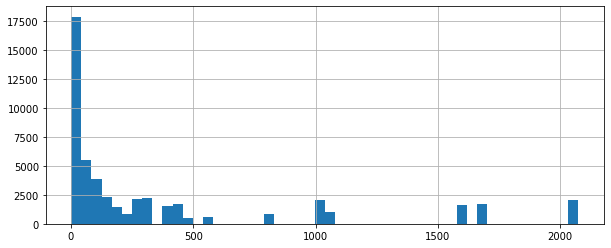

In [32]:
plt.figure(figsize=(10,4))
df5['totalRatingCount'].hist(bins=50)

In [34]:
df5['totalRatingCount'].unique()

array([   1,    3,    6,   27,    8,    5,   15,    2,   14,   31,   13,
         10, 1051,   20,    4,   23,  250,   29,   82,   26,  139,  171,
        484,  431,   84,  222,  138,   47,   17,    7,   32,    9,   21,
         12,   60,   24,   83,  107,   28,   19,   95,   38,   18,   36,
        199,  110,  119,   11,   70,   42,   39,   35,  174,   79,   62,
         25,   16,   98,  124,   33,   52,  185,  332,   49,   51,   53,
         30,  262,   99,   61,   76,   50,   34,   86,   66,   57,   56,
        109,   68,  149,  128,  105,   89,  321,   58,   37,   74,   22,
        106,   40,   43,  122,   96,   44,   90,  121,   59,   78,  282,
        103,   55,  392,  183,   72,  277,  100,  457,  209,  260,  579,
        430, 2075,  387,   45,  132,   94,  326,  268,  303, 1586,   88,
         46,   64,  126,   91,  423,  137,   73,  184,  104,   48,  148,
        254,  313,  144,  151,  195,   65,  102,  179,   77, 1030,  398,
       1006,  146,  120,  136,   71,  286,  403, 16

In [35]:
df5['totalRatingCount'].max()

2075

In [36]:
df5['totalRatingCount'].min()

1

In [46]:
threshold = 50
df6 = df5.query('totalRatingCount >= @threshold')
df6.head()

,userId,productId,Rating,totalRatingCount
183,A1BKC6B7YHYTVV,0972683275,4.0,1051
184,AWVFSIB42LHKJ,0972683275,4.0,1051
185,A36MQBNADRH8YY,0972683275,5.0,1051
186,A3SRXMPLAEZ6DP,0972683275,4.0,1051
187,A20XXTXWF2TCPY,0972683275,5.0,1051


In [47]:
df6.shape

(30958, 4)

In [61]:
print(len(np.unique(df6['userId'])))
print(len(np.unique(df6['productId'])))

29974
169


In [62]:
## First lets create a Pivot table
df7 = df6.pivot_table(index='productId',columns='userId',values='Rating').fillna(0)
df7.head()

userId,A014623426J5CM7M12MBW,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A06374853B2OXBKB6H1YT,A0641581307AKT5MAOU0Q,A0677968MUIZV1URPJAN,A076219533YHEV2LJO988,A07730732C0MK8X9APP6C,A0821988FXKFYX53V4QG,A08523431UFFNYIQR59LY,A092907613PUH3WG01CIR,A099626739FNCRNHIKBCG,A1003EYWAQFOUG,A1008Z48LB2QI4,A100JU1B8KT9UX,A100LLXMXDZHJZ,A100R120QT9E2M,A100SER4Z9YAWR,A100WHX0JSGXDB,A100WO06OQR8BQ,A10121433FMMZNY18RWZ8,A1013OEQCVS6AR,A1013Q8NLCY56R,A101DJDPGK0Q46,A101IWCCIWQWC9,A101N04POEB9CL,A1025SYFKSMERB,A10278SNCAL01Q,A1027EV8A9PV1O,A10285OSAM1MZK,A1028F2JVII4S7,A1028XZRNI0NRP,A102D49JO9BOZY,A102EC3XGCBZ81,A102IUFPXVDRB6,A102L0RVI4LHH3,...,AZTM2VXPJ5P72,AZTPP57BPF0W7,AZTZ61W23JET0,AZUUV3DEO6Z4J,AZUZN8VUBS7OV,AZV2U6GU5QA6C,AZV6J8966E8IE,AZV7OPCN8AQ9U,AZV8YD0X0F5Z3,AZV9WA9MNT0FB,AZVL57D2NG3T1,AZVN14GTO4OEQ,AZVRZHRWM2OVA,AZVW65SN5RTIC,AZW00EZPYT274,AZW0FW3EQEJX1,AZW8H05DVPSGS,AZW932L3FM9O6,AZWHN4ENMEZLI,AZWMBFVSZ66G2,AZWOPBY75SGAM,AZWTRKAX60DLB,AZX0ZDVAFMN78,AZX1LX5YHT4LB,AZX2RDN9YXZAE,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXCV0SD51HI9,AZXIGU9MBPYW,AZXKUK895VGSM,AZXP46IB63PU8,AZXWUZ9PPSOTL,AZYTSU42BZ7TP,AZZA7IQWTXCH3,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZP8BC9WE0N8,AZZST8OYL5P4Q,AZZUBI2MEAHI9,AZZZEWADNFNUM
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
import scipy
from scipy.sparse import csr_matrix

In [65]:
df8 = csr_matrix(df7.values)
df8

<169x29974 sparse matrix of type '<class 'numpy.float64'>'
	with 30958 stored elements in Compressed Sparse Row format>

In [66]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df8)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [73]:
query_index = np.random.choice(df7.shape[0])
query_index

68

In [84]:
distances,indices = model_knn.kneighbors(df7.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

In [88]:
print(distances)
print(indices)

[[0.         0.99191967 0.99332887 0.99384797 0.99448703 0.99512952]]
[[ 68 124  62 102  25 142]]


In [92]:
#flatten converts a 2d array into 1d array
print(distances.flatten())

[0.         0.99191967 0.99332887 0.99384797 0.99448703 0.99512952]


In [93]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for product {0}:\n'.format(df7.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df7.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for product B00000JI4F:

1: B00003CWDG, with distance of 0.9919196733527984:
2: B00000JDF6, with distance of 0.9933288732402239:
3: B0000222MY, with distance of 0.9938479680761724:
4: B000001ON6, with distance of 0.9944870328007203:
5: B00004S9AK, with distance of 0.9951295195014652:
